# GSAF Analysis (Global Shark Attack File)

##### `Objective and goals`
##### Our stakeholders want us to create a clean sample of data, while answering 4 key questions

1. Which months do most shark attacks occur?
1. What top 5 water-related activities are most likely to result in a shark attack?
1. What time do most shark attacks occur? (Morning, afternoon, evening or night)
1. What top 5 species of shark are most likely to attack?

# Code

##### `Import modules`

In [34]:
# importing modules
import pandas as pd
import numpy as np

##### `Exploring data`

In [35]:
# importing data frame
df = pd.read_excel('GSAF5.xls')

# checking df
df.head(3)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,14 Jul-2023,2023.0,Unprovoked,USA,Florida,New Smyrna Beach,Surfing,male,M,21,...,NaN,"Wesh2, 7/14/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Reported 14 Jul-2023,2023.0,Watercraft,SOUTH AFRICA,Eastern Cape Province,Chinta East,Watching the sardine run,crew,NaN,NaN,...,NaN,"Ladbible, 7/14/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04 Jul-2023,2023.0,Unprovoked,ECUADOR,Galapagos Islands,Mosquera Islet,Snorkeling,Delia Yriarte,F,42,...,NaN,"T. Smith, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# checking column index
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number',
       'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [37]:
# there is whitespace in the Sex column, creating a dictionary to validate and store the results
columns_info = {
    "trailing_whitespace": [col for col in df.columns if col.endswith(" ")],
    "leading_whitespace": [col for col in df.columns if col.startswith(" ")],
}

# print the results
if columns_info["trailing_whitespace"]:
    print("Columns with trailing whitespace in the headers:", columns_info["trailing_whitespace"])
else:
    print("No columns with trailing whitespace in the headers.")

if columns_info["leading_whitespace"]:
    print("Columns with leading whitespace in the headers:", columns_info["leading_whitespace"])
else:
    print("No columns with leading whitespace in the headers.")

Columns with trailing whitespace in the headers: ['Sex ', 'Species ']
No columns with leading whitespace in the headers.


In [38]:
# remove whitespace
df.columns = df.columns.str.strip()

# check code
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number',
       'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

### Create a filtered df based on our objective

In [39]:
#creating new df
df = df[['Date', 'Activity', 'Time', 'Species']]
#checking df
df

,Date,Activity,Time,Species
0,14 Jul-2023,Surfing,15h00,NaN
1,Reported 14 Jul-2023,Watching the sardine run,NaN,NaN
2,04 Jul-2023,Snorkeling,NaN,NaN
3,04 Jul-2023,Standing,16h25,4' shark
4,04 Jul-2023,Swimming,13h55,3' shark
...,...,...,...,...
6898,NaN,NaN,NaN,NaN
6899,NaN,NaN,NaN,NaN
6900,NaN,NaN,NaN,NaN
6901,NaN,NaN,NaN,NaN


In [41]:
# checking nans
df.isna().sum()

Date          25
Activity     608
Time        3536
Species     3127
dtype: int64

### Cleaning data

#### `Date`

In [44]:
# checking df head
df.head(3)

,Date,Activity,Time,Species
0,14 Jul-2023,Surfing,15h00,NaN
1,Reported 14 Jul-2023,Watching the sardine run,NaN,NaN
2,04 Jul-2023,Snorkeling,NaN,NaN


In [45]:
# convert the datae column to a pandas datetime object
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# create new columns for day, month, and year
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.strftime('%B')  # Convert month number to month name
df["Year"] = df["Date"].dt.year

# drop rows with NaN values in the "Year," "Month," and "Day" columns
df.dropna(subset=["Year", "Month", "Day"], inplace=True)

# convert the new columns to integers
df[["Day", "Year"]] = df[["Day", "Year"]].astype(int)

# reorder the columns in the DataFrame
df = df[['Year', 'Month', 'Day', 'Activity', 'Time', 'Species']]

# check df
df

,Year,Month,Day,Activity,Time,Species
0,2023,July,14,Surfing,15h00,NaN
2,2023,July,4,Snorkeling,NaN,NaN
3,2023,July,4,Standing,16h25,4' shark
4,2023,July,4,Swimming,13h55,3' shark
5,2023,July,4,Swimming,13h50,NaN
...,...,...,...,...,...,...
6727,1723,January,1,NaN,NaN,NaN
6728,1721,June,1,Swimming,NaN,"White shark, 1600-lb female"
6729,1703,March,26,Swimming,Night,NaN
6739,1970,January,1,Ship lay at anchor & man was working on its ru...,NaN,NaN


#### `Activity`

In [46]:
#checking nans
df['Activity'].isna().sum()

444

In [47]:
# too many nans to just delete, fillna as Not Specified
df.loc[df["Activity"].isnull(), "Activity"] = "Not Specified"

# checking code
df['Activity'].isna().sum()

0

#### `Time`

In [48]:
# define the time pattern
time_pattern = r'^(\d{1,2})h(\d{2})$'

# extract rows with time in the format "15h00" (number number h number number)
valid_time_rows = df["Time"].str.extract(time_pattern)

# convert valid_time_rows to datetime format and display in AM/PM format
valid_times = pd.to_datetime(valid_time_rows[0].astype(str) + ":" + valid_time_rows[1].astype(str), format='%H:%M', errors='coerce')
df.loc[valid_times.notna(), "Time"] = valid_times[valid_times.notna()].dt.strftime('%I:%M %p')

# replace unparseable values with "Not Specified"
df.loc[valid_times.isna(), "Time"] = "Not Specified"

# reset the index if needed
df = df.reset_index(drop=True)

# Display the DataFrame with the new "Time" column
df

,Year,Month,Day,Activity,Time,Species
0,2023,July,14,Surfing,03:00 PM,NaN
1,2023,July,4,Snorkeling,Not Specified,NaN
2,2023,July,4,Standing,04:25 PM,4' shark
3,2023,July,4,Swimming,01:55 PM,3' shark
4,2023,July,4,Swimming,01:50 PM,NaN
...,...,...,...,...,...,...
6001,1723,January,1,Not Specified,Not Specified,NaN
6002,1721,June,1,Swimming,Not Specified,"White shark, 1600-lb female"
6003,1703,March,26,Swimming,Not Specified,NaN
6004,1970,January,1,Ship lay at anchor & man was working on its ru...,Not Specified,NaN


In [49]:
# validating code
#df['Time'].unique()

##### `Species`

In [50]:
# species is MESSSSY, im thinking best way to aggregate data is by extracting shark names and deleting anything that is ambiguous
#df['Species'].unique().tolist()

In [51]:
import pandas as pd

# Define the replacement dictionary
replace_dict = {
    r'.*sand.*tiger.*': 'Sand Tiger Shark',
    r'.*tiger.*': 'Tiger Shark',
    r'.*caribbean.*reef.*': 'Caribbean Reef Shark',
    r'.*grey.*reef.*': 'Grey Reef Shark',
    r'.*white.*': 'White Shark',
    r'.*bull.*': 'Bull Shark',
    r'.*bronze.*whaler.*': 'Bronze Whaler Shark',
    r'.*lemon.*': 'Lemon Shark',
    r'.*mako.*': 'Mako Shark',
    r'.*nurse.*': 'Nurse Shark',
    r'.*blacktip.*': 'Blacktip Shark',
    r'.*oceanic.*whitetip.*': 'Oceanic Whitetip Shark',
    r'.*spinner.*': 'Spinner Shark',
    r'.*hammerhead.*': 'Hammerhead Shark',
    r'.*port.*jackson.*': 'Port Jackson Shark',
    r'.*dusky.*': 'Dusky Shark',
    r'.*thresher.*': 'Thresher Shark',
    r'.*silvertip.*': 'Silvertip Shark',
    r'.*goblin.*': 'Goblin Shark',
    r'.*cow.*': 'Cow Shark',
    r'.*tawny.*nurse.*': 'Tawny Nurse Shark',
    r'.*zambesi.*': 'Zambesi Shark',
    r'.*raggedtooth.*': 'Raggedtooth Shark',
    r'.*wobbegong.*': 'Wobbegong Shark',
    r'.*blue.*': 'Blue Shark',
    r'.*sevengill.*': 'Sevengill Shark',
    r'.*cookiecutter.*': 'Cookiecutter Shark',
    r'.*porbeagle.*': 'Porbeagle Shark',
    r'.*angel.*': 'Angel Shark',
    r'.*spurdog.*': 'Spurdog',
    r'.*broadnose.*sevengill.*': 'Broadnose Sevengill Shark',
    r'.*blacktip.*reef.*': 'Blacktip Reef Shark'
}

# Create a new column 'cleaned_species' and initialize it with 'Not Specified'
df['cleaned_species'] = 'Not Specified'

# Convert everything to strings
df['Species'] = df['Species'].astype(str)

# Iterate through the dictionary and use str.contains() to find matches and update the 'cleaned_species' column
for pattern, replacement in replace_dict.items():
    mask = df['Species'].str.contains(pattern, case=False)
    df.loc[mask, 'cleaned_species'] = replacement

# Display the updated DataFrame
df.head()

,Year,Month,Day,Activity,Time,Species,cleaned_species
0,2023,July,14,Surfing,03:00 PM,nan,Not Specified
1,2023,July,4,Snorkeling,Not Specified,nan,Not Specified
2,2023,July,4,Standing,04:25 PM,4' shark,Not Specified
3,2023,July,4,Swimming,01:55 PM,3' shark,Not Specified
4,2023,July,4,Swimming,01:50 PM,nan,Not Specified


In [52]:
# reorder the columns in the DataFrame
df = df[['Year', 'Month', 'Day', 'Activity', 'Time', 'cleaned_species']]
df

,Year,Month,Day,Activity,Time,cleaned_species
0,2023,July,14,Surfing,03:00 PM,Not Specified
1,2023,July,4,Snorkeling,Not Specified,Not Specified
2,2023,July,4,Standing,04:25 PM,Not Specified
3,2023,July,4,Swimming,01:55 PM,Not Specified
4,2023,July,4,Swimming,01:50 PM,Not Specified
...,...,...,...,...,...,...
6001,1723,January,1,Not Specified,Not Specified,Not Specified
6002,1721,June,1,Swimming,Not Specified,White Shark
6003,1703,March,26,Swimming,Not Specified,Not Specified
6004,1970,January,1,Ship lay at anchor & man was working on its ru...,Not Specified,Not Specified


In [53]:
# set the option to display max amt of rows i set
pd.set_option('display.max_rows', 10)

# display the first 10
df.head(10)

,Year,Month,Day,Activity,Time,cleaned_species
0,2023,July,14,Surfing,03:00 PM,Not Specified
1,2023,July,4,Snorkeling,Not Specified,Not Specified
2,2023,July,4,Standing,04:25 PM,Not Specified
3,2023,July,4,Swimming,01:55 PM,Not Specified
4,2023,July,4,Swimming,01:50 PM,Not Specified
5,2023,July,3,Surfing,05:20 PM,Not Specified
6,2023,July,3,Swimming,01:45 PM,Tiger Shark
7,2023,June,23,Swimming,Not Specified,Not Specified
8,2023,June,23,Fishing,10:10 AM,Not Specified
9,2023,June,8,Swimming,03:00 PM,Tiger Shark


In [55]:
df.to_csv('cleaned_data.csv', index=False)

# Graphing

In [56]:
# importing modules
import matplotlib.pyplot as plt

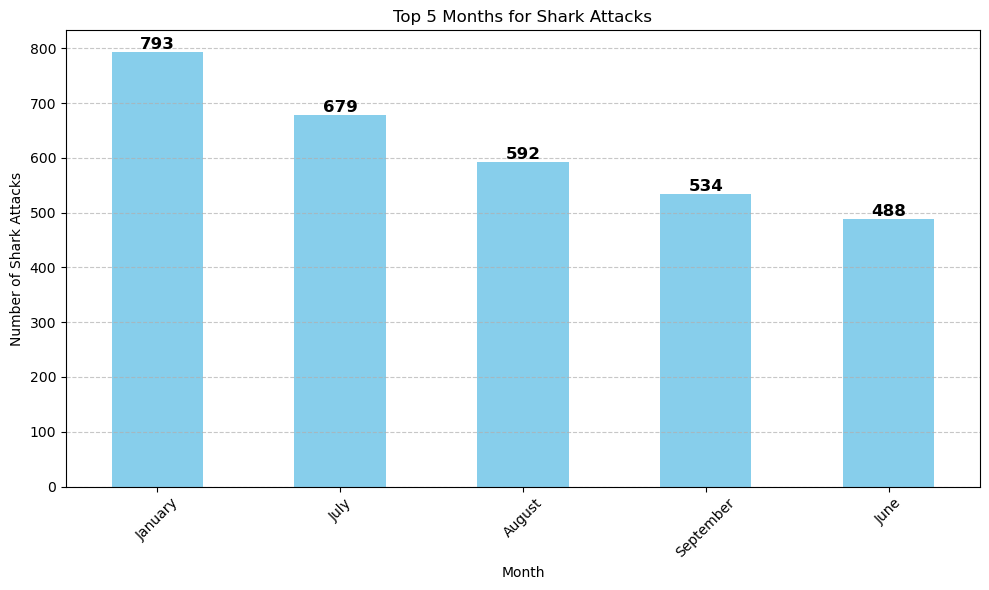

In [60]:
# convert the month column to datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%B')

# extract the month names from the 'Month' column and store them in the 'Month_Name' column
df['Month_Name'] = df['Month'].dt.strftime('%B')

# count the occurrences of each month
top_5_months = df['Month_Name'].value_counts().nlargest(5)

# plot the bar graph for the top 5 months
plt.figure(figsize=(10, 6))
bar_plot = top_5_months.plot(kind='bar', color='skyblue')

plt.title('Top 5 Months for Shark Attacks')
plt.xlabel('Month')
plt.ylabel('Number of Shark Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# adding labels
for index, value in enumerate(top_5_months):
    bar_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

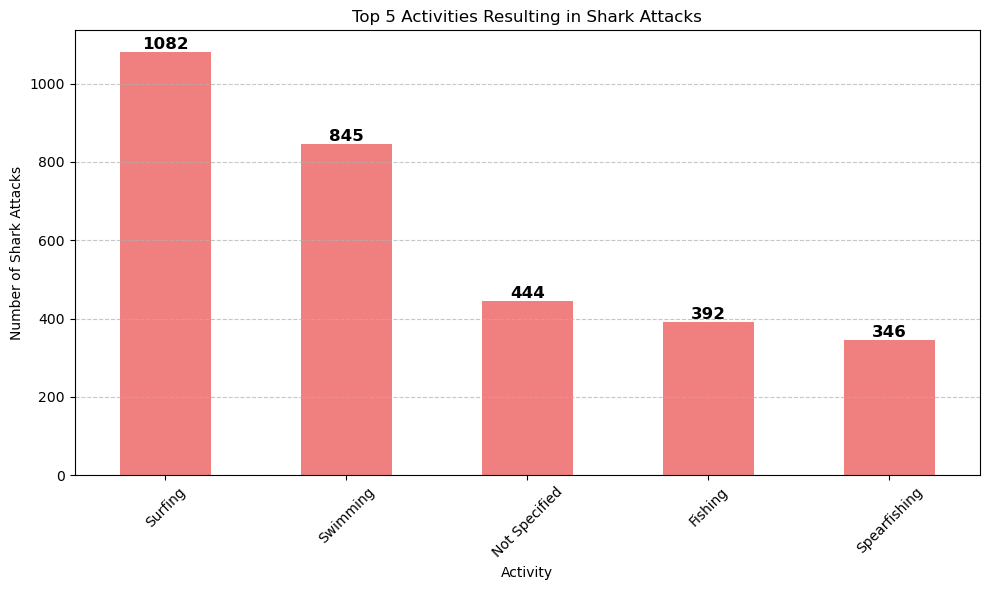

In [61]:
# count the occurrences of each activity
top_5_activities = df['Activity'].value_counts().nlargest(5)

# plot bar graph for the top 5 activities
plt.figure(figsize=(10, 6))
bar_plot = top_5_activities.plot(kind='bar', color='lightcoral')

plt.title('Top 5 Activities Resulting in Shark Attacks')
plt.xlabel('Activity')
plt.ylabel('Number of Shark Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add labels
for index, value in enumerate(top_5_activities):
    bar_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

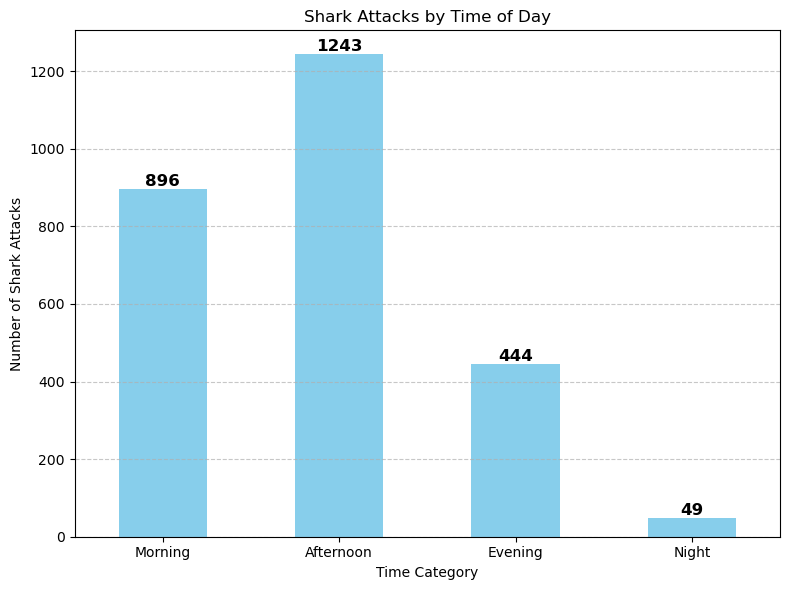

In [62]:
from datetime import datetime

# function to categorize the time into Morning, Afternoon, Evening, and Night
def categorize_time(time_str):
    if time_str == 'Not Specified':
        return 'Not Specified'
    
    time_obj = datetime.strptime(time_str, '%I:%M %p')
    hour = time_obj.hour
    
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# apply the categorization function to create a new column 'Time_Category'
df['Time_Category'] = df['Time'].apply(categorize_time)

# filter out 'Not Specified' values
df_filtered = df[df['Time_Category'] != 'Not Specified']

# count the occurrences of each time category
time_counts = df_filtered['Time_Category'].value_counts()

# sort the time categories in the desired order
time_categories = ['Morning', 'Afternoon', 'Evening', 'Night']
time_counts = time_counts.reindex(time_categories)

# create a bar graph for the time categories
plt.figure(figsize=(8, 6))
bar_plot = time_counts.plot(kind='bar', color='skyblue')

plt.title('Shark Attacks by Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Number of Shark Attacks')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add labels
for index, value in enumerate(time_counts):
    bar_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

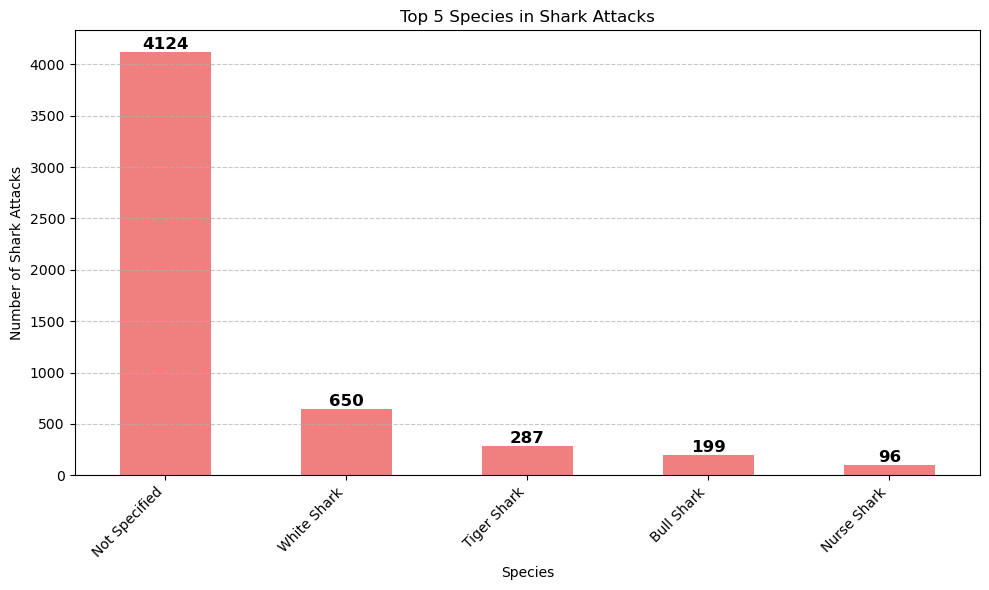

In [63]:
# get the top 5 species with the highest number of shark attacks
top_species = df['cleaned_species'].value_counts().nlargest(5)

# create a bar plot for the top 5 species
plt.figure(figsize=(10, 6))
bar_plot = top_species.plot(kind='bar', color='lightcoral')

plt.title('Top 5 Species in Shark Attacks')
plt.xlabel('Species')
plt.ylabel('Number of Shark Attacks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add labels
for index, value in enumerate(top_species):
    bar_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()